In [92]:
library(ggplot2)
library(reshape2)

In [93]:
# Get auroc on CV with the maximum mean in the model
get_auroc <- function(cv,col_name){
    auroc_on_CV_str <- cv[which.max(cv$mean_auroc_on_CV),"auroc_on_CV"]
    auroc_on_CV_str <- gsub('\\]|\\[',"",auroc_on_CV_str)
    auroc_on_CV_df <- data.frame(as.double(unlist(strsplit(auroc_on_CV_str,","))))
    colnames(auroc_on_CV_df) <- col_name
    return(auroc_on_CV_df)
}

# lncRNA

In [125]:
# Original range of parameter 
ori_range_ML_CV <- read.csv("/data/rnomics8/yuanguohua/RNAlight_Private/lncRNA/03_Model_Construction/01_Machine_Learning_Model/01_ML_Model_Output/ML_CV_result.tsv",sep = '\t')
ori_range_CNN_CV <- read.csv("/data/rnomics8/yuanguohua/RNAlight_Private/lncRNA/03_Model_Construction/02_Deep_Learning_Model/01_DL_Model_Output/CNN_4000nt_Model_Output/CNN_CV_result.tsv",sep='\t')
ori_range_CNN_RNN_CV <- read.csv("/data/rnomics8/yuanguohua/RNAlight_Private/lncRNA/03_Model_Construction/02_Deep_Learning_Model/01_DL_Model_Output/CNN_RNN_4000nt_Model_Output/CNN_RNN_CV_result.tsv",sep='\t')
ori_range_RNN_CV <- read.csv("/data/rnomics8/yuanguohua/RNAlight_Private/lncRNA/03_Model_Construction/02_Deep_Learning_Model/01_DL_Model_Output/RNN_4000nt_Model_Output/RNN_CV_result.tsv",sep='\t')
ori_range_CNN <- get_auroc(ori_range_CNN_CV,"CNN")
ori_range_CNN_RNN <- get_auroc(ori_range_CNN_RNN_CV,"CNN_RNN")
ori_range_RNN <- get_auroc(ori_range_RNN_CV,"RNN")

# Combination
ori_range_CV_result <- cbind(ori_range_ML_CV,ori_range_CNN,ori_range_CNN_RNN,ori_range_RNN)
ori_range_CV_result_long <-melt(ori_range_CV_result,measure.vars=colnames(ori_range_CV_result),variable.name="model",value.name="auroc")
ori_range_CV_result_long$range <- "ori"

In [127]:
# Expand range of parameter 
exp_range_ML_CV <- read.csv("./lncRNA/01_Machine_Learning_Model/01_ML_Model_Output/ML_CV_result.tsv",sep = '\t')
exp_range_CNN_CV <- read.csv("./lncRNA/02_Deep_Learning_Model/01_DL_Model_Output/CNN_4000nt_Model_Output/CNN_CV_result.tsv",sep='\t')
exp_range_CNN_RNN_CV <- read.csv("./lncRNA/02_Deep_Learning_Model/01_DL_Model_Output/CNN_RNN_4000nt_Model_Output/CNN_RNN_CV_result.tsv",sep='\t')
exp_range_RNN_CV <- read.csv("./lncRNA/02_Deep_Learning_Model/01_DL_Model_Output/RNN_4000nt_Model_Output/RNN_CV_result.tsv",sep='\t')

exp_range_CNN <- get_auroc(exp_range_CNN_CV,"CNN")
exp_range_CNN_RNN <- get_auroc(exp_range_CNN_RNN_CV,"CNN_RNN")
exp_range_RNN <- get_auroc(exp_range_RNN_CV,"RNN")

# Combination
exp_range_CV_result <- cbind(exp_range_ML_CV,exp_range_CNN,exp_range_CNN_RNN,exp_range_RNN)
exp_range_CV_result_long <-melt(exp_range_CV_result,measure.vars=colnames(exp_range_CV_result),variable.name="model",value.name="auroc")
exp_range_CV_result_long$range <- "exp"

In [128]:
total_range_CV_df <- rbind(ori_range_CV_result_long, exp_range_CV_result_long)
total_range_CV_df$model <- factor(total_range_CV_df$model,levels = c("lgb","SVM","lr","CNN","CNN_RNN","RNN"))
total_range_CV_df$range <- factor(total_range_CV_df$range,levels = c("ori","exp"))

In [129]:
head(total_range_CV_df )

,model,auroc,range
,<fct>,<dbl>,<fct>
1,SVM,0.7464461,ori
2,SVM,0.7152471,ori
3,SVM,0.7346196,ori
4,SVM,0.7238258,ori
5,SVM,0.7307832,ori
6,lgb,0.7472712,ori


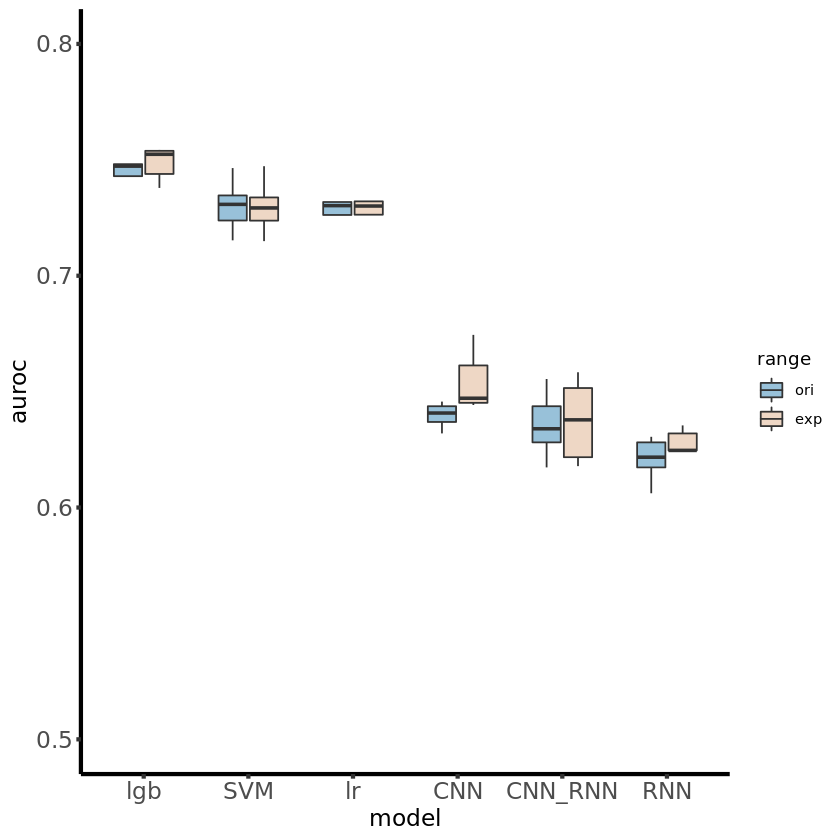

In [130]:
# plot
p_box <- ggplot(data=total_range_CV_df ,aes(x=model,y=auroc,fill = range))+
geom_boxplot(width = 0.6,outlier.color="white")+
scale_fill_manual(values =  c("#98c1d9","#eed7c5"))+
ylim(0.5,0.8)+theme_classic()+
theme(axis.text = element_text(size=14),
      axis.title = element_text(size=14),
      element_line(size = 1.2))
ggsave("./lncRNA_CV_comparison_expand_parameter_range_with_text.pdf", p_box, width = 10, height = 10) 

p_box 

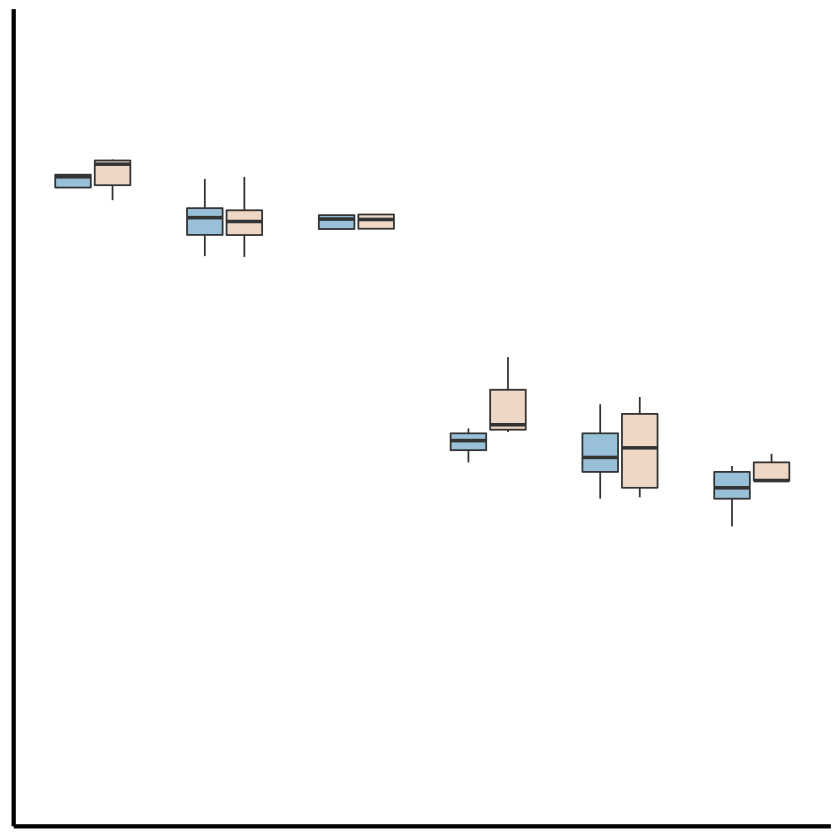

In [131]:
p_box2 <- p_box + theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./lncRNA_CV_comparison_expand_parameter_range.pdf", p_box2, width = 10, height = 10) 

p_box2

In [132]:
t.test(exp_range_CV_result$lgb, ori_range_CV_result$lgb)


	Welch Two Sample t-test

data:  exp_range_CV_result$lgb and ori_range_CV_result$lgb
t = 0.30077, df = 6.8985, p-value = 0.7725
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01229471  0.01586589
sample estimates:
mean of x mean of y 
0.7484516 0.7466660 


In [133]:
t.test(exp_range_CV_result$SVM, ori_range_CV_result$SVM)


	Welch Two Sample t-test

data:  exp_range_CV_result$SVM and ori_range_CV_result$SVM
t = -0.053591, df = 7.9945, p-value = 0.9586
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01770342  0.01689936
sample estimates:
mean of x mean of y 
0.7297823 0.7301843 


In [134]:
t.test(exp_range_CV_result$lr, ori_range_CV_result$lr)


	Welch Two Sample t-test

data:  exp_range_CV_result$lr and ori_range_CV_result$lr
t = 0.010343, df = 8, p-value = 0.992
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01872639  0.01889513
sample estimates:
mean of x mean of y 
0.7300360 0.7299517 


In [135]:
t.test(exp_range_CV_result$CNN, ori_range_CV_result$CNN)


	Welch Two Sample t-test

data:  exp_range_CV_result$CNN and ori_range_CV_result$CNN
t = 2.2992, df = 5.351, p-value = 0.06642
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.001412349  0.030732733
sample estimates:
mean of x mean of y 
0.6544600 0.6397998 


In [136]:
t.test(exp_range_CV_result$CNN_RNN, ori_range_CV_result$CNN_RNN)


	Welch Two Sample t-test

data:  exp_range_CV_result$CNN_RNN and ori_range_CV_result$CNN_RNN
t = 0.17071, df = 7.7041, p-value = 0.8688
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02214133  0.02565611
sample estimates:
mean of x mean of y 
0.6374577 0.6357003 


In [137]:
t.test(exp_range_CV_result$RNN, ori_range_CV_result$RNN)


	Welch Two Sample t-test

data:  exp_range_CV_result$RNN and ori_range_CV_result$RNN
t = 0.77036, df = 7.9987, p-value = 0.4632
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.009346848  0.018724148
sample estimates:
mean of x mean of y 
0.6254411 0.6207524 


In [138]:
# lgb, svm, lr, CNN, CNN_RNN
ori_test_result <- data.frame(auc = c(0.7833019077196096,0.7545474711623781,0.7561279946761312,0.718029059449867,0.7091559449866904,0.630129769299024))
ori_test_result$model <- c("lgb","SVM","lr","CNN","CNN_RNN","RNN")
ori_test_result$range <- "ori"

exp_test_result <- data.frame(auc = c(0.7918700088731143,0.7550743123336292,0.7566548358473824,0.7190550133096718,0.7164485359361136,0.651120230700976))
exp_test_result$model <- c("lgb","SVM","lr","CNN","CNN_RNN","RNN")
exp_test_result$range <- "exp"

In [139]:
total_range_test_df <-rbind(ori_test_result,exp_test_result)
total_range_test_df$model <- factor(total_range_test_df$model,levels = c("lgb","SVM","lr","CNN","CNN_RNN","RNN"))
total_range_test_df$range <- factor(total_range_test_df$range,levels = c("ori","exp"))

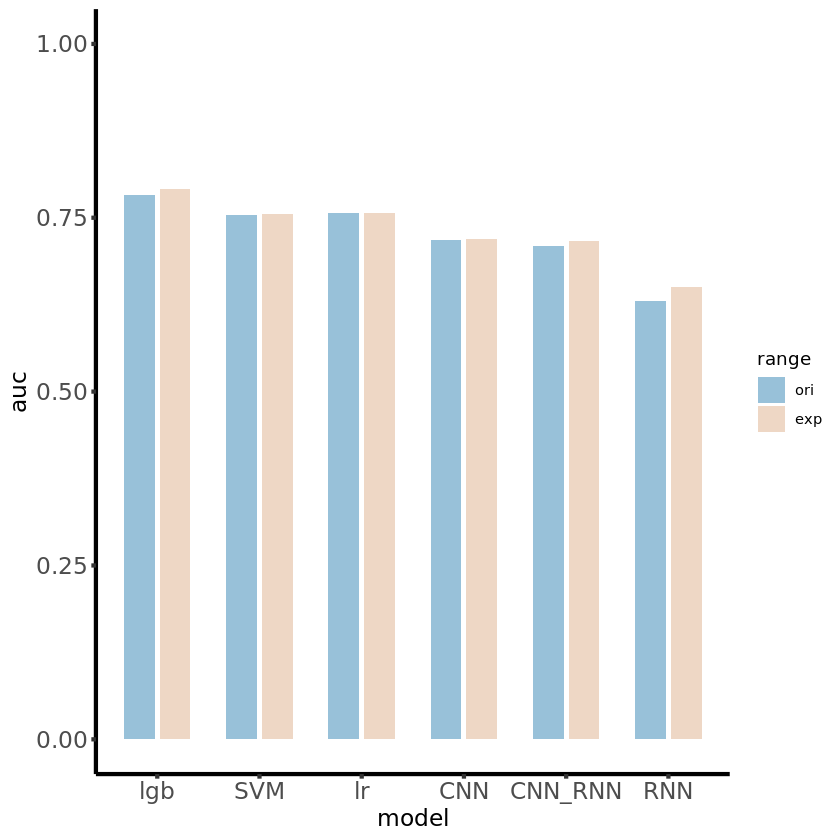

In [140]:
p_auc_RNALight_bar <- ggplot(total_range_test_df  ,aes(x=model,y=auc,fill = range))+
geom_bar(stat="identity",position=position_dodge(0.7),width=0.6)+
ylim(0,1) +
theme_classic()+
scale_fill_manual(values=c("#98c1d9","#eed7c5"))+
theme(axis.text = element_text(size=14),
      axis.title = element_text(size=14),
element_line(size = 1.2))
ggsave("./lncRNA_test_comparison_expand_parameter_range_with_text.pdf",p_auc_RNALight_bar, width = 10, height = 10) 
p_auc_RNALight_bar

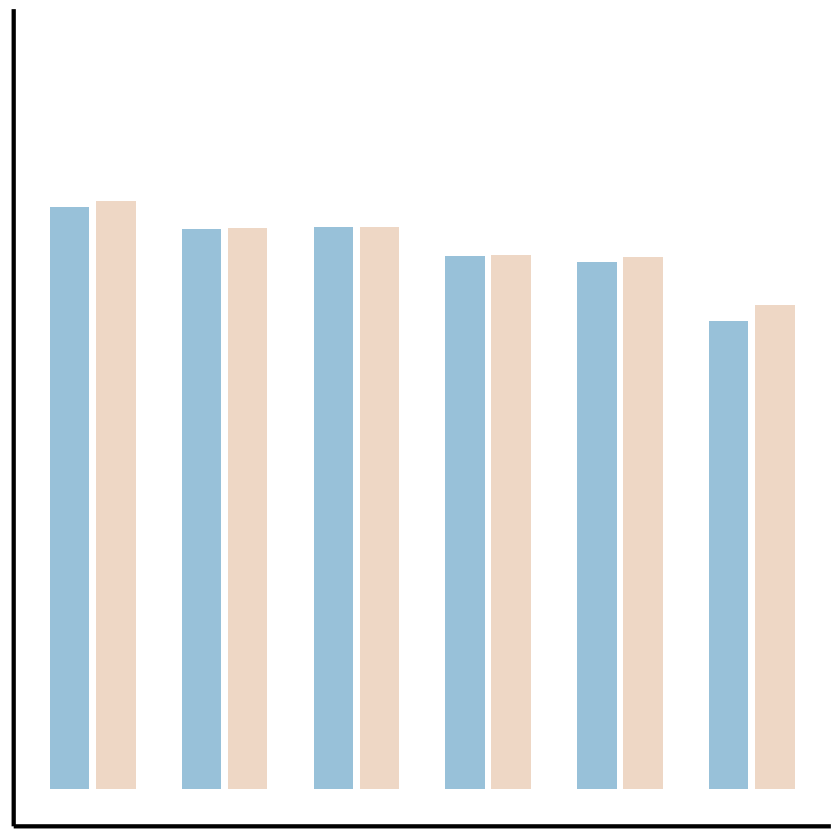

In [141]:
p_auc_RNALight_bar2 <-p_auc_RNALight_bar  + theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./lncRNA_test_comparison_expand_parameter_range.pdf",p_auc_RNALight_bar2 , width = 10, height = 10)
p_auc_RNALight_bar2 

# mRNA

In [143]:
# Original range of parameter 
ori_range_ML_CV <- read.csv("/data/rnomics8/yuanguohua/RNAlight_Private/mRNA/03_Model_Construction/01_Machine_Learning_Model/01_ML_Model_Output/ML_CV_result.tsv",sep = '\t')
ori_range_CNN_CV <- read.csv("/data/rnomics8/yuanguohua/RNAlight_Private/mRNA/03_Model_Construction/02_Deep_Learning_Model/01_DL_Model_Output/CNN_9000nt_Model_Output/CNN_CV_result.tsv",sep='\t')
ori_range_CNN_RNN_CV <- read.csv("/data/rnomics8/yuanguohua/RNAlight_Private/mRNA/03_Model_Construction/02_Deep_Learning_Model/01_DL_Model_Output/CNN_RNN_9000nt_Model_Output/CNN_RNN_CV_result.tsv",sep='\t')
ori_range_RNN_CV <- read.csv("/data/rnomics8/yuanguohua/RNAlight_Private/mRNA/03_Model_Construction/02_Deep_Learning_Model/01_DL_Model_Output/RNN_9000nt_Model_Output/RNN_CV_result.tsv",sep='\t')

ori_range_CNN <- get_auroc(ori_range_CNN_CV,"CNN")
ori_range_CNN_RNN <- get_auroc(ori_range_CNN_RNN_CV,"CNN_RNN")
ori_range_RNN <- get_auroc(ori_range_RNN_CV,"RNN")

# Combination
ori_range_CV_result <- cbind(ori_range_ML_CV,ori_range_CNN,ori_range_CNN_RNN,ori_range_RNN)
ori_range_CV_result_long <-melt(ori_range_CV_result,measure.vars=colnames(ori_range_CV_result),variable.name="model",value.name="auroc")
ori_range_CV_result_long$range <- "ori"

In [144]:
# Expand range of parameter 
exp_range_ML_CV <- read.csv("./mRNA/01_Machine_Learning_Model/01_ML_Model_Output/ML_CV_result.tsv",sep = '\t')
exp_range_CNN_CV <- read.csv("./mRNA/02_Deep_Learning_Model/01_DL_Model_Output/CNN_9000nt_Model_Output/CNN_CV_result.tsv",sep='\t')
exp_range_CNN_RNN_CV <- read.csv("./mRNA/02_Deep_Learning_Model/01_DL_Model_Output/CNN_RNN_9000nt_Model_Output/CNN_RNN_CV_result.tsv",sep='\t')
exp_range_RNN_CV <- read.csv("./mRNA/02_Deep_Learning_Model/01_DL_Model_Output/RNN_9000nt_Model_Output/RNN_CV_result.tsv",sep='\t')


exp_range_CNN <- get_auroc(exp_range_CNN_CV,"CNN")
exp_range_CNN_RNN <- get_auroc(exp_range_CNN_RNN_CV,"CNN_RNN")
exp_range_RNN <- get_auroc(exp_range_RNN_CV,"RNN")


# Combination
exp_range_CV_result <- cbind(exp_range_ML_CV,exp_range_CNN,exp_range_CNN_RNN,exp_range_RNN)
exp_range_CV_result_long <-melt(exp_range_CV_result,measure.vars=colnames(exp_range_CV_result),variable.name="model",value.name="auroc")
exp_range_CV_result_long$range <- "exp"

In [145]:
total_range_CV_df <- rbind(ori_range_CV_result_long, exp_range_CV_result_long)
total_range_CV_df$model <- factor(total_range_CV_df$model,levels = c("lgb","SVM","lr","CNN","CNN_RNN","RNN"))
total_range_CV_df$range <- factor(total_range_CV_df$range,levels = c("ori","exp"))

In [146]:
head(total_range_CV_df )

,model,auroc,range
,<fct>,<dbl>,<fct>
1,SVM,0.6947355,ori
2,SVM,0.6663987,ori
3,SVM,0.6349959,ori
4,SVM,0.6721344,ori
5,SVM,0.6694973,ori
6,lgb,0.7573167,ori


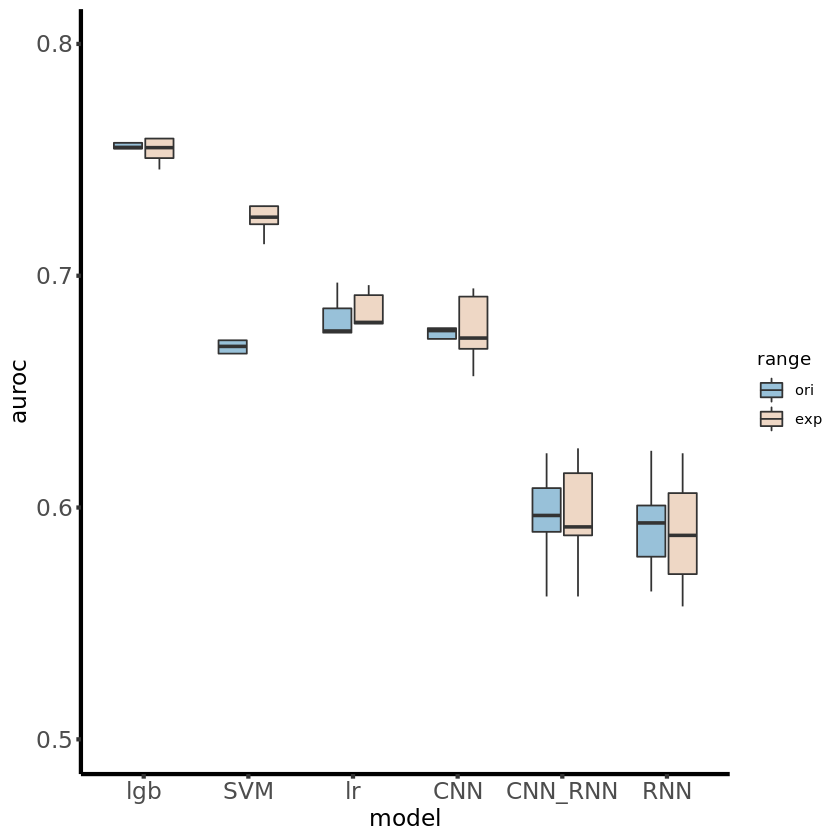

In [147]:
# plot
p_box <- ggplot(data=total_range_CV_df ,aes(x=model,y=auroc,fill = range))+
geom_boxplot(width = 0.6,outlier.color="white")+
scale_fill_manual(values =  c("#98c1d9","#eed7c5"))+
ylim(0.5,0.8)+theme_classic()+
theme(axis.text = element_text(size=14),
      axis.title = element_text(size=14),
      element_line(size = 1.2))
ggsave("./mRNA_CV_comparison_expand_parameter_range_with_text.pdf", p_box, width = 10, height = 10) 

p_box 

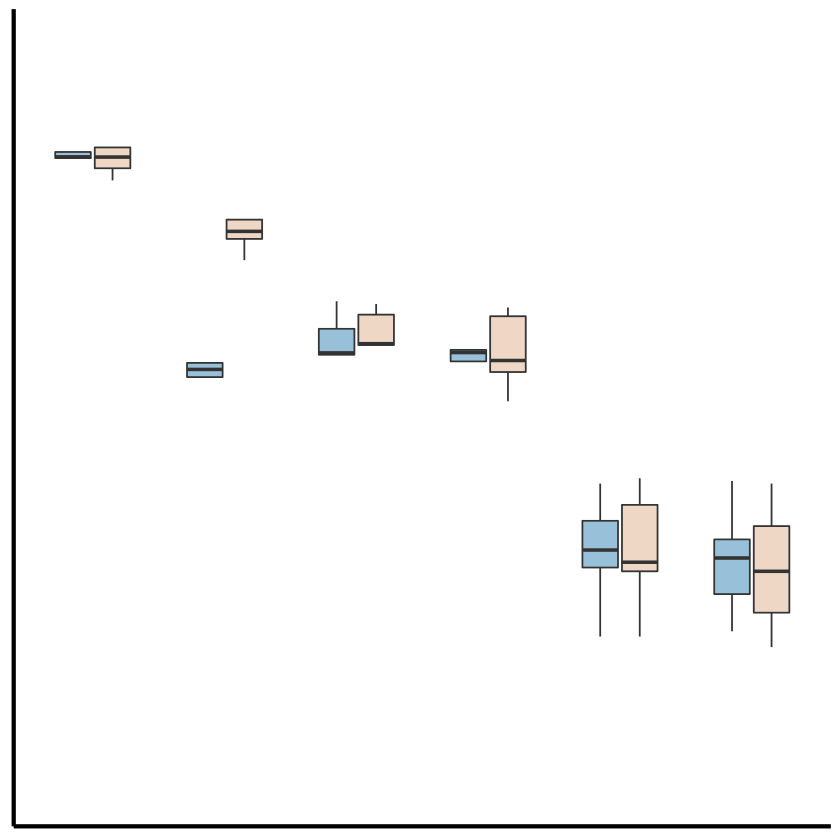

In [148]:
p_box2 <- p_box + theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./mRNA_CV_comparison_expand_parameter_range.pdf", p_box2, width = 10, height = 10) 

p_box2

In [149]:
t.test(exp_range_CV_result$lgb, ori_range_CV_result$lgb)


	Welch Two Sample t-test

data:  exp_range_CV_result$lgb and ori_range_CV_result$lgb
t = 0.0086596, df = 7.6956, p-value = 0.9933
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01392391  0.01402815
sample estimates:
mean of x mean of y 
0.7568377 0.7567856 


In [150]:
t.test(exp_range_CV_result$SVM, ori_range_CV_result$SVM)


	Welch Two Sample t-test

data:  exp_range_CV_result$SVM and ori_range_CV_result$SVM
t = 5.6527, df = 4.8052, p-value = 0.002734
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.03058471 0.08276648
sample estimates:
mean of x mean of y 
0.7242279 0.6675524 


In [151]:
t.test(exp_range_CV_result$lr, ori_range_CV_result$lr)


	Welch Two Sample t-test

data:  exp_range_CV_result$lr and ori_range_CV_result$lr
t = 0.44974, df = 7.591, p-value = 0.6655
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01932586  0.02858164
sample estimates:
mean of x mean of y 
0.6811972 0.6765694 


In [152]:
t.test(exp_range_CV_result$CNN, ori_range_CV_result$CNN)


	Welch Two Sample t-test

data:  exp_range_CV_result$CNN and ori_range_CV_result$CNN
t = 0.41941, df = 7.2118, p-value = 0.6871
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01678394  0.02407407
sample estimates:
mean of x mean of y 
0.6767451 0.6731001 


In [153]:
t.test(exp_range_CV_result$CNN_RNN, ori_range_CV_result$CNN_RNN)


	Welch Two Sample t-test

data:  exp_range_CV_result$CNN_RNN and ori_range_CV_result$CNN_RNN
t = 0.028217, df = 7.9508, p-value = 0.9782
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03464730  0.03550479
sample estimates:
mean of x mean of y 
0.5963191 0.5958903 


In [154]:
t.test(exp_range_CV_result$RNN, ori_range_CV_result$RNN)


	Welch Two Sample t-test

data:  exp_range_CV_result$RNN and ori_range_CV_result$RNN
t = -0.19171, df = 7.8441, p-value = 0.8528
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.03922838  0.03322577
sample estimates:
mean of x mean of y 
0.5892428 0.5922441 


In [155]:
# lgb, svm, lr, CNN, CNN_RNN
ori_test_result <- data.frame(auc = c(0.7984119782214156,0.6981170598911071,0.7136721113127648,0.7086963097398669,0.5650332728372656, 0.5252419842710224))
ori_test_result$model <- c("lgb","SVM","lr","CNN","CNN_RNN","RNN")
ori_test_result$range <- "ori"

exp_test_result <- data.frame(auc = c(0.809739866908651,0.7668179068360558,0.7208711433756805,0.7704627949183304,0.5728372655777374, 0.5349969751966122))
exp_test_result$model <- c("lgb","SVM","lr","CNN","CNN_RNN","RNN")
exp_test_result$range <- "exp"

In [156]:
total_range_test_df <-rbind(ori_test_result,exp_test_result)
total_range_test_df$model <- factor(total_range_test_df$model,levels = c("lgb","SVM","lr","CNN","CNN_RNN","RNN"))
total_range_test_df$range <- factor(total_range_test_df$range,levels = c("ori","exp"))

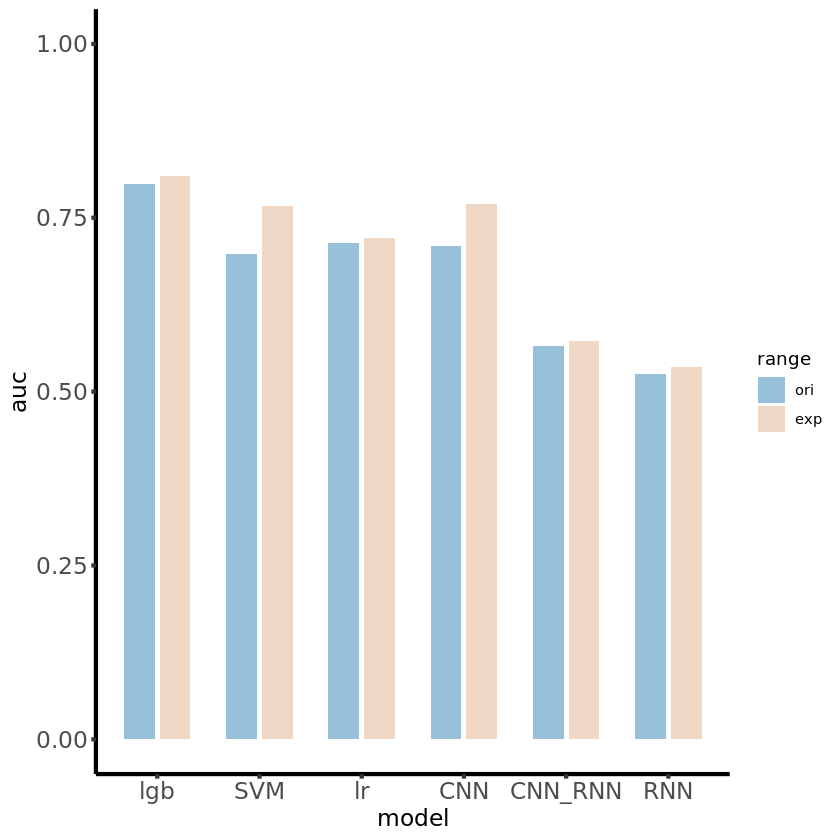

In [157]:
p_auc_RNALight_bar <- ggplot(total_range_test_df  ,aes(x=model,y=auc,fill = range))+
geom_bar(stat="identity",position=position_dodge(0.7),width=0.6)+
ylim(0,1) +
theme_classic()+
scale_fill_manual(values=c("#98c1d9","#eed7c5"))+
theme(axis.text = element_text(size=14),
      axis.title = element_text(size=14),
element_line(size = 1.2))
ggsave("./mRNA_test_comparison_expand_parameter_range_with_text.pdf",p_auc_RNALight_bar, width = 10, height = 10) 
p_auc_RNALight_bar

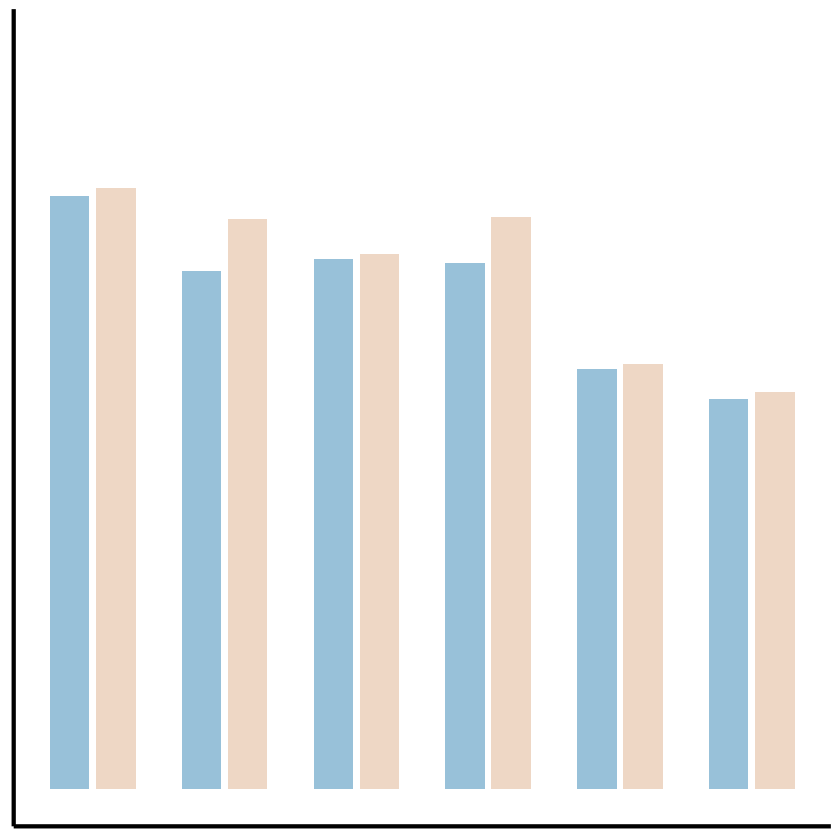

In [158]:
p_auc_RNALight_bar2 <-p_auc_RNALight_bar  + theme(axis.text = element_blank(),axis.title = element_blank(),axis.ticks = element_blank(),legend.position = "None")
ggsave("./mRNA_test_comparison_expand_parameter_range.pdf",p_auc_RNALight_bar2 , width = 10, height = 10)
p_auc_RNALight_bar2 